In [1]:
library("lattice")
library("latticeExtra")
library("ggplot2")


Attaching package: ‘ggplot2’

The following object is masked from ‘package:latticeExtra’:

    layer



In [2]:
theme_replace(panel.border = element_rect(color = "black", fill = F),
              panel.background = element_rect(fill = "white"), 
              legend.position = "top",
              strip.background = element_rect(colour="black", fill="navajowhite1"),
              text = element_text(size=12),
              strip.text = element_text(size = 12))

# intro.r

In [3]:
data(Chem97, package = "mlmRev")
xtabs( ~ score, data = Chem97)

score
   0    2    4    6    8   10 
3688 3627 4619 5739 6668 6681 

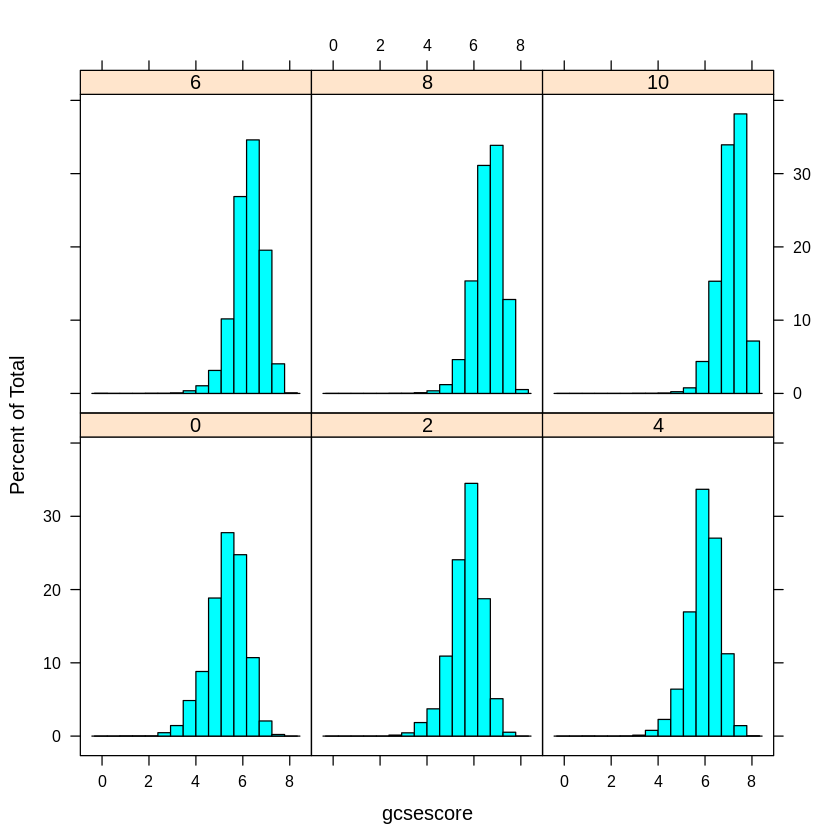

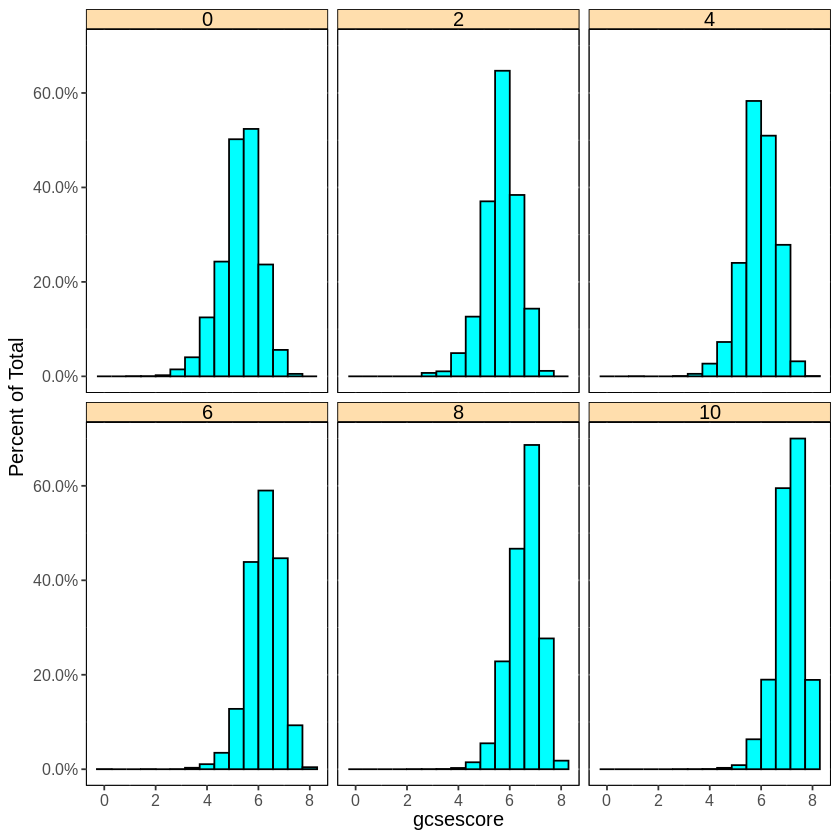

In [4]:
histogram(~ gcsescore | factor(score), data = Chem97)
ggplot(Chem97, aes(x = gcsescore)) +
    facet_wrap(~factor(score), ncol=3) +
    scale_y_continuous(labels = scales::percent) +
    geom_histogram(aes(y = ..density..), color = "black", fill = "cyan", bins = 15) +
    ylab("Percent of Total")

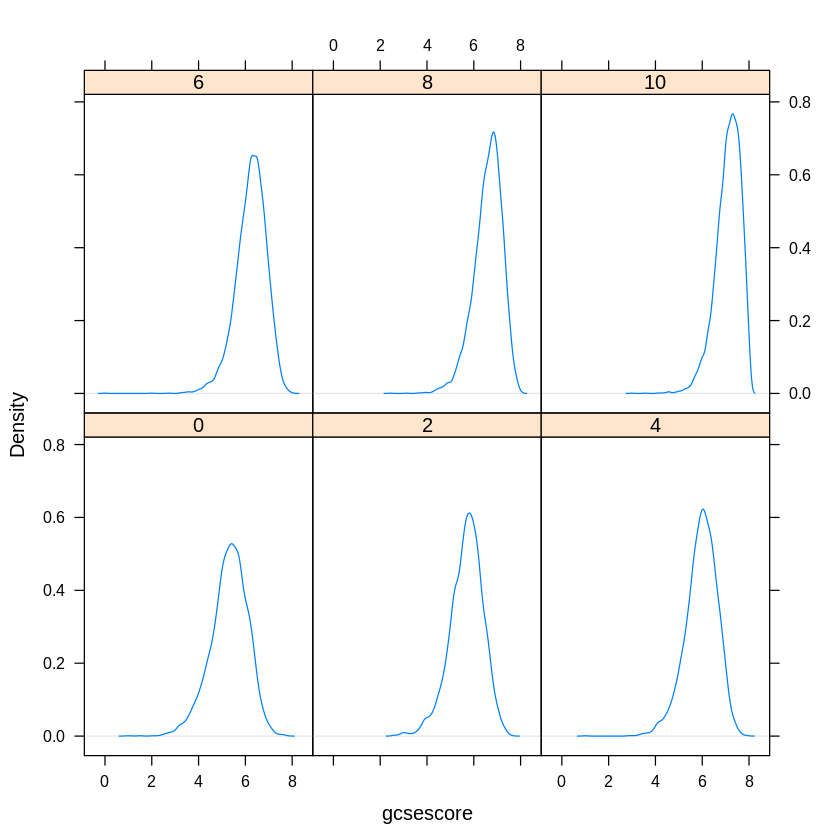

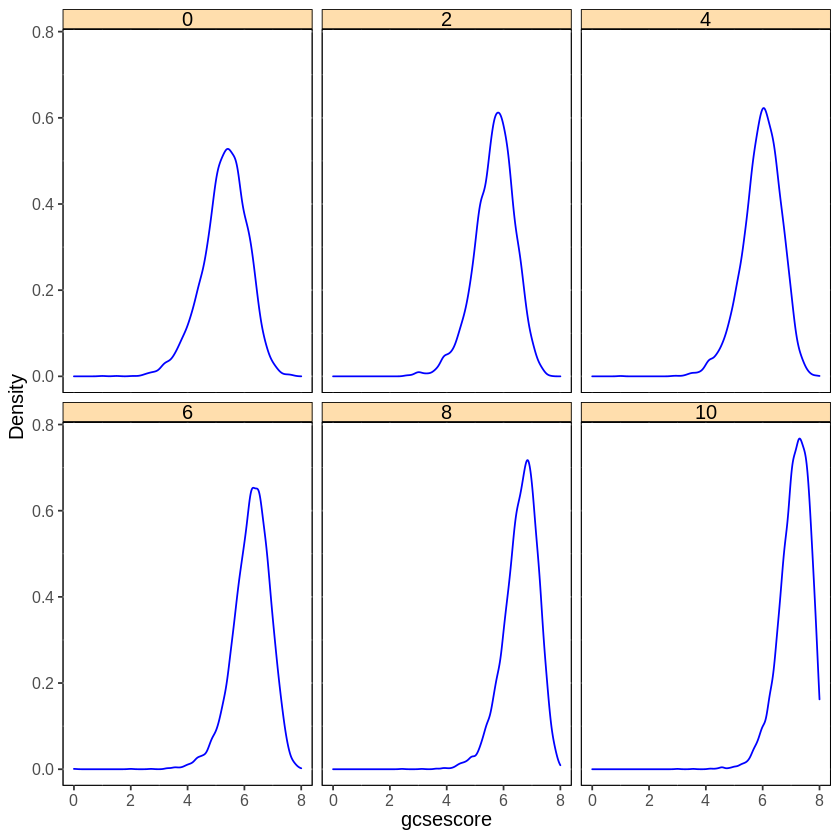

In [5]:
densityplot(~ gcsescore | factor(score), data = Chem97, 
            plot.points = FALSE, ref = TRUE)
ggplot(Chem97, aes(x = gcsescore)) +
    geom_density(color= "blue") +
    facet_wrap(~factor(score)) +
    ylab("Density")

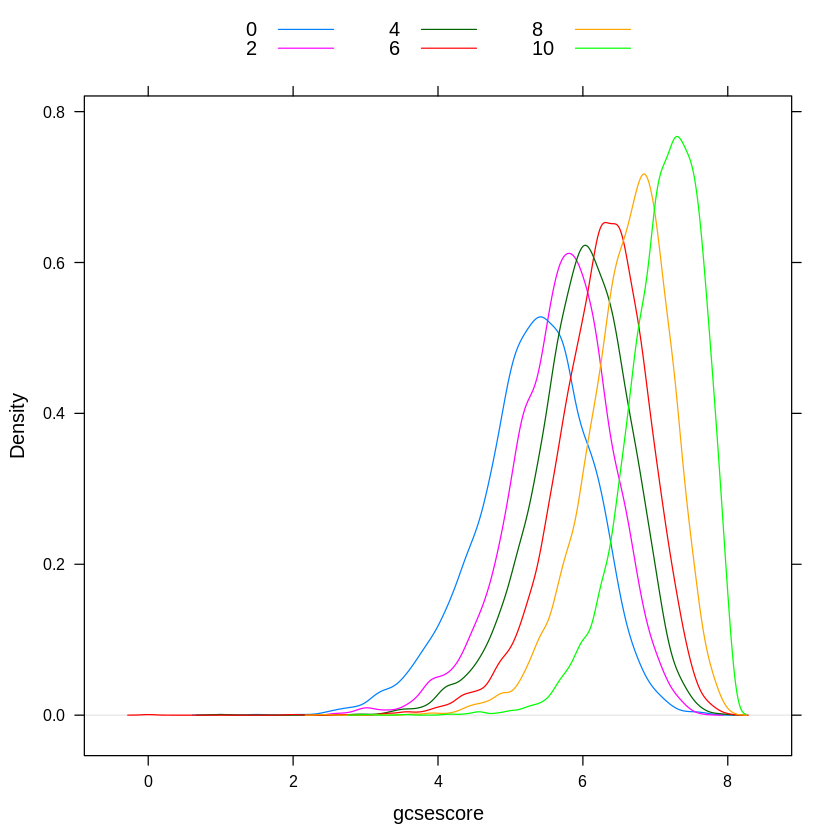

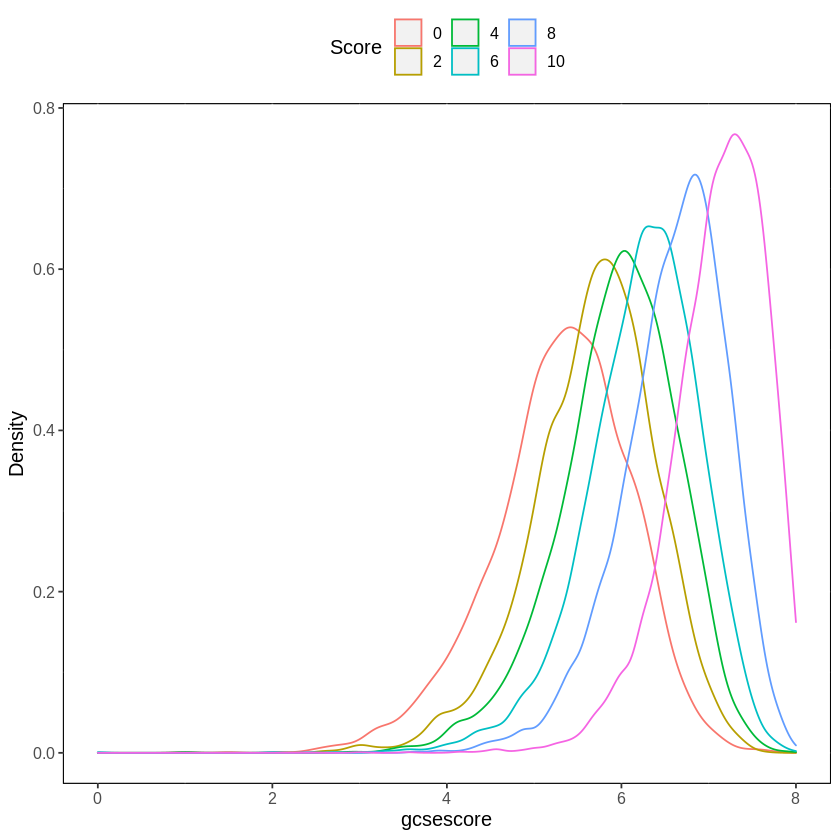

In [6]:
densityplot(~ gcsescore, data = Chem97, groups = score,
            plot.points = FALSE, ref = TRUE,
            auto.key = list(columns = 3))
ggplot(Chem97, aes(x = gcsescore)) +
    geom_density(aes(color= factor(score))) +
    labs(color = "Score", y = "Density")

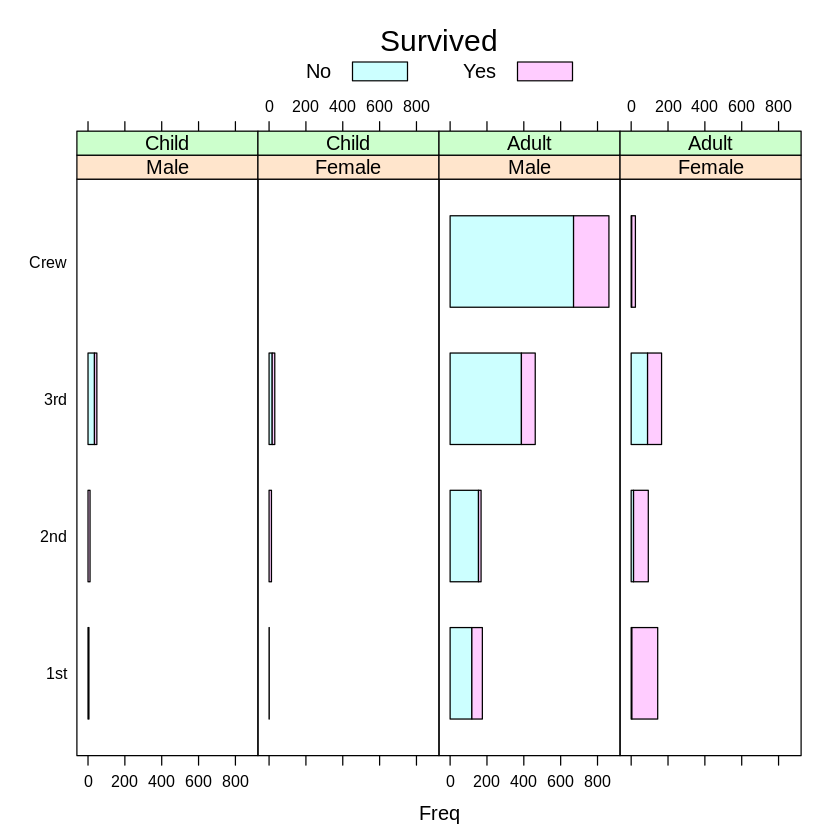

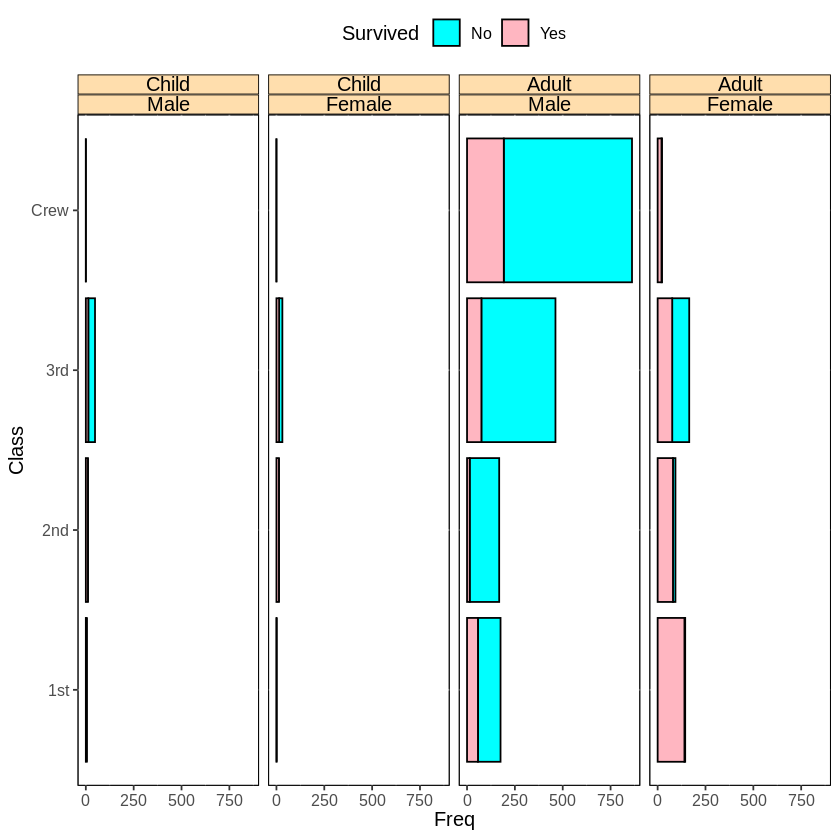

In [7]:
barchart(Class ~ Freq | Sex + Age, data = as.data.frame(Titanic),
         groups = Survived, stack = TRUE, layout = c(4, 1),
         auto.key = list(title = "Survived", columns = 2))
ggplot(as.data.frame(Titanic), aes(x = Freq,y = Class, fill = Survived)) +
    geom_col(color = "black") +
    facet_grid(cols = vars(Age,Sex)) +
    scale_fill_manual(values=c("cyan", "lightpink"))

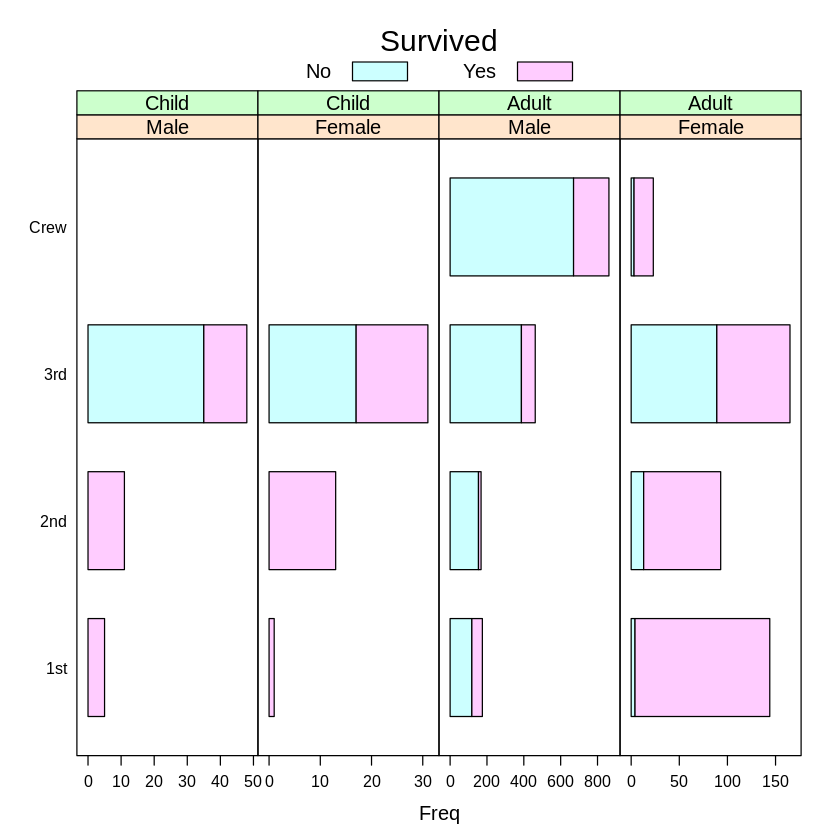

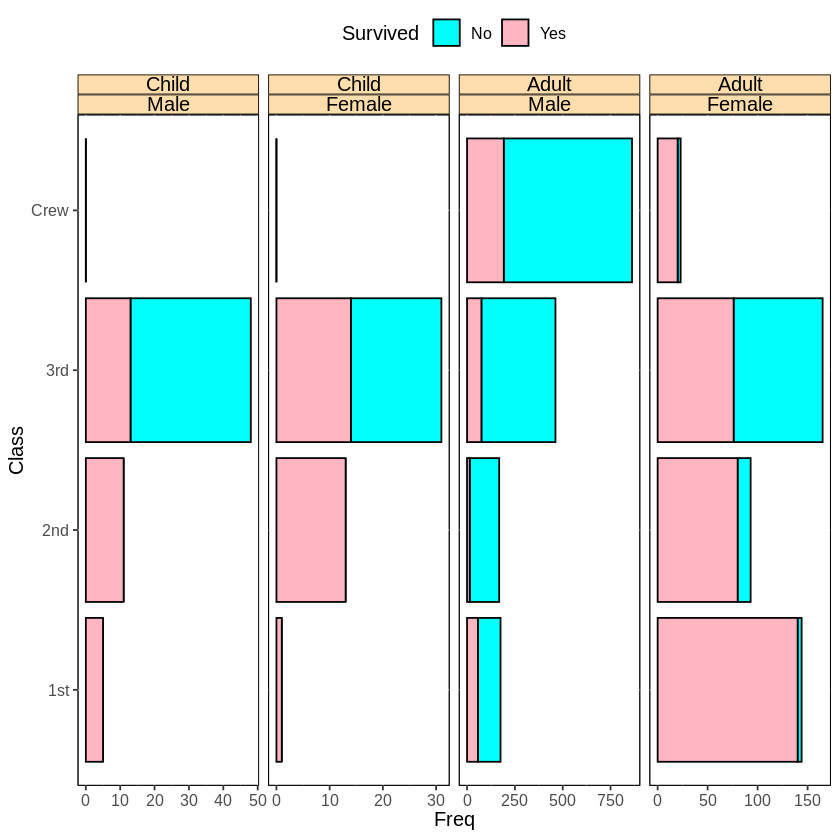

In [8]:
barchart(Class ~ Freq | Sex + Age, data = as.data.frame(Titanic),
         groups = Survived, stack = TRUE, layout = c(4, 1),
         auto.key = list(title = "Survived", columns = 2),
         scales = list(x = "free"))
ggplot(as.data.frame(Titanic), aes(x = Freq, y = Class, fill = Survived)) + 
    geom_col(color = "black") +
    facet_grid(cols = vars(Age, Sex), scales = "free_x") +
    scale_fill_manual(values=c("cyan", "lightpink"))

# univariate.r

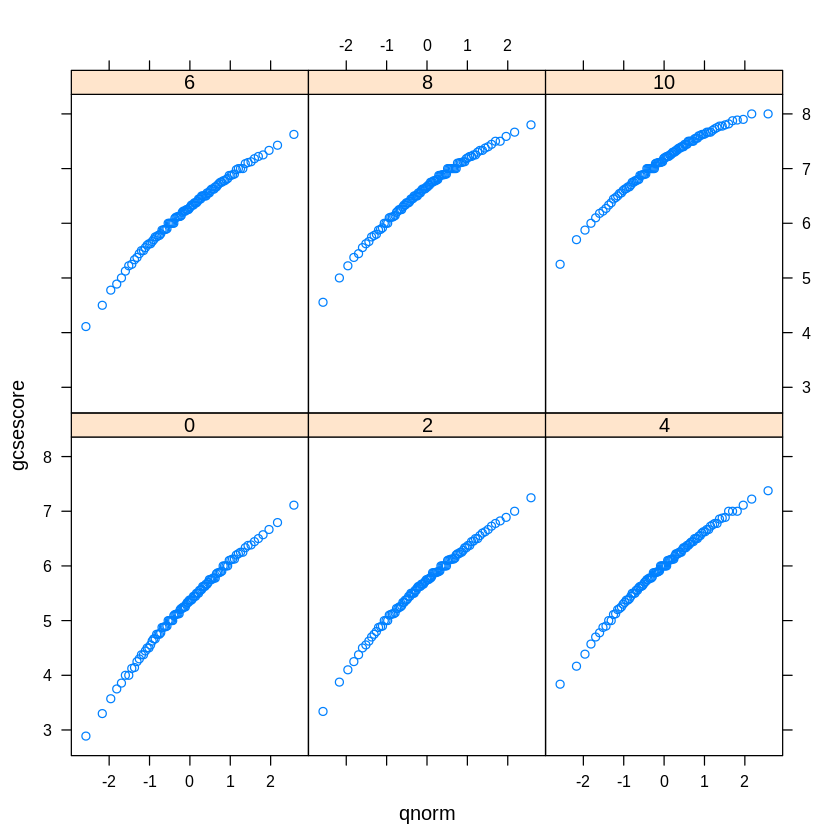

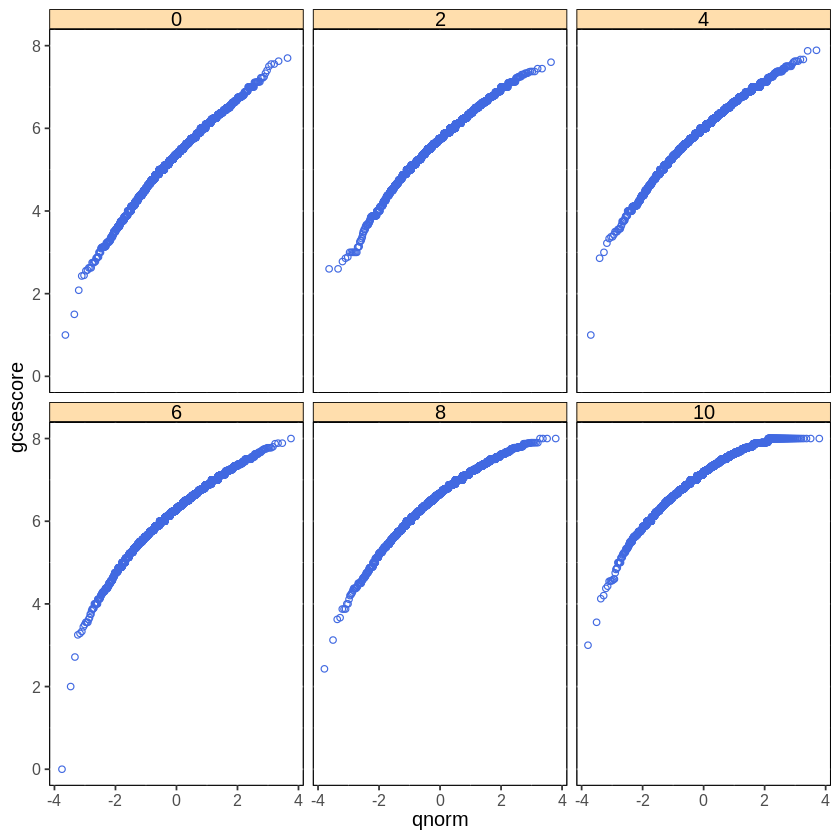

In [9]:
qqmath(~ gcsescore | factor(score), data = Chem97,
       f.value = ppoints(100))
ggplot(Chem97, aes(sample = gcsescore)) +
    facet_wrap(~factor(score)) +
    stat_qq(color = "royalblue", shape = 1) +
    labs(x = "qnorm", y = "gcsescore")

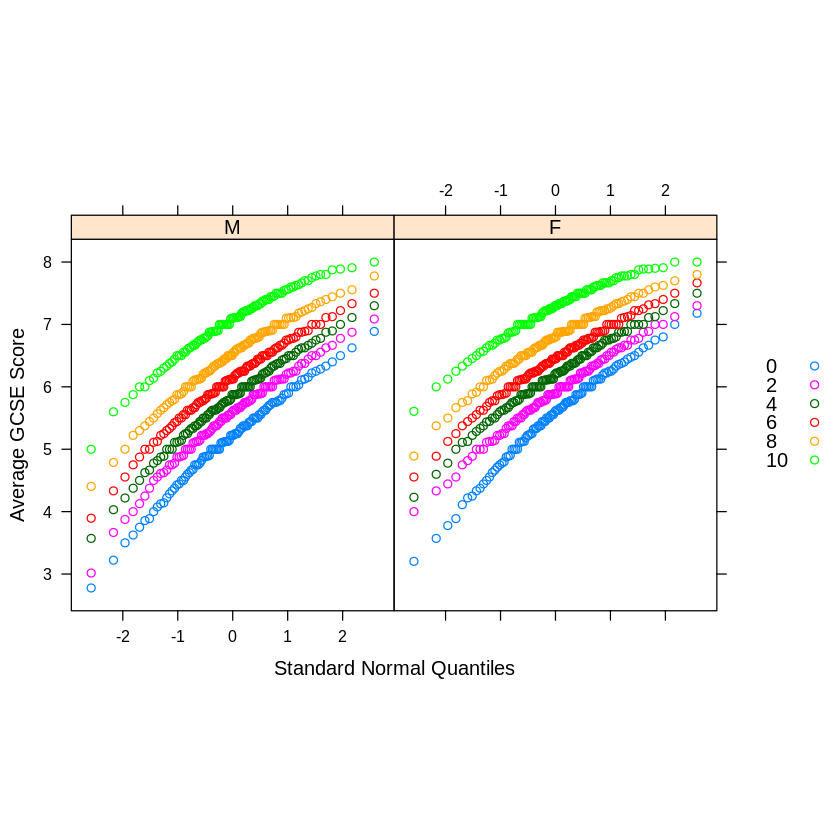

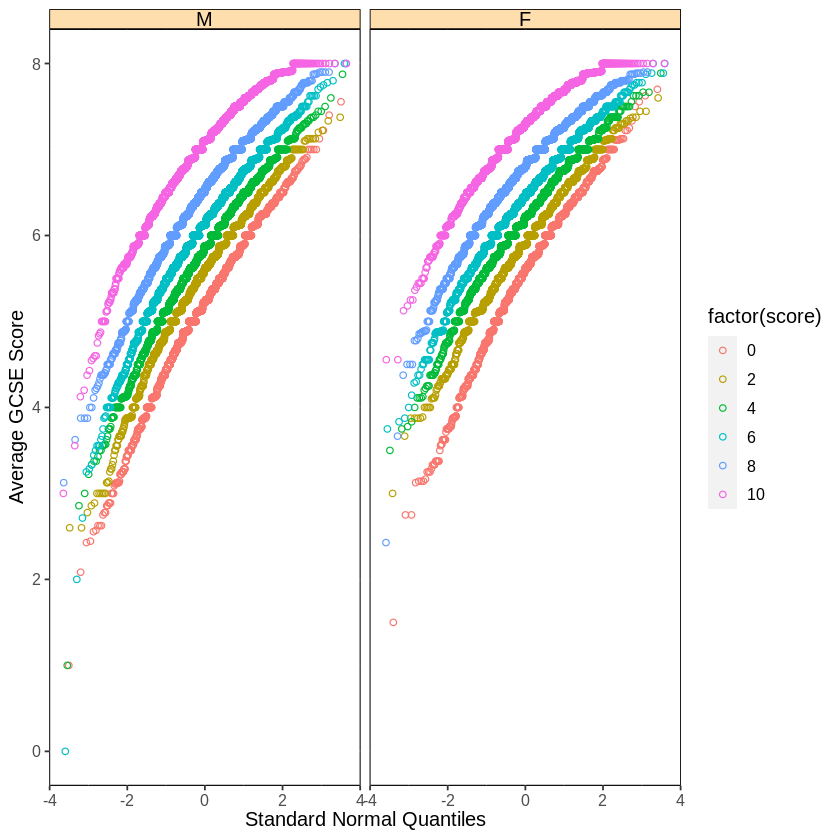

In [10]:
qqmath(~ gcsescore | gender, Chem97, groups = score, aspect = "xy",
       f.value = ppoints(100), auto.key = list(space = "right"),
       xlab = "Standard Normal Quantiles",
       ylab = "Average GCSE Score")
ggplot(Chem97, aes(sample = gcsescore, color = factor(score))) +
    facet_wrap(~factor(gender)) +
    stat_qq(shape = 1) +
    theme(legend.position = "right") +
    labs(x = "Standard Normal Quantiles", y="Average GCSE Score")

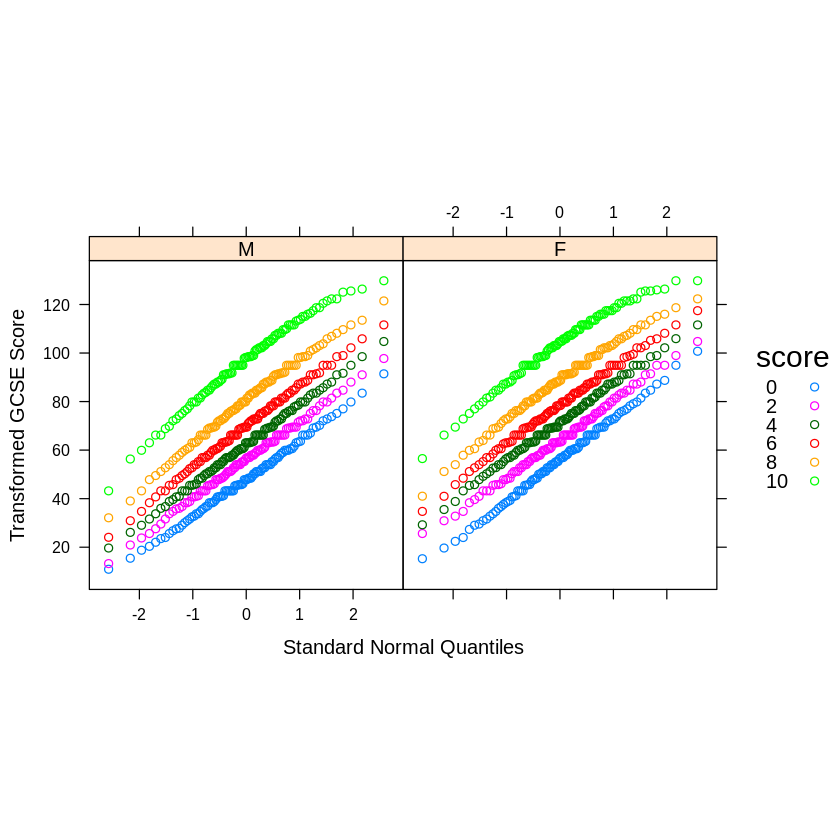

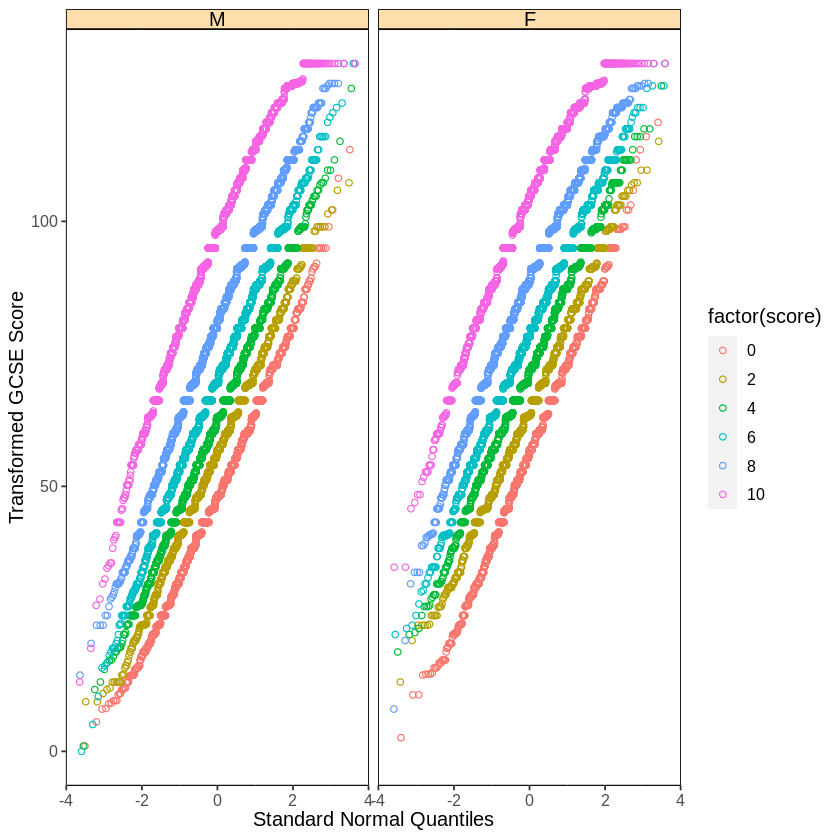

In [11]:
Chem97.mod <- transform(Chem97, gcsescore.trans = gcsescore^2.34)
qqmath(~ gcsescore.trans | gender, Chem97.mod, groups = score,
       f.value = ppoints(100), aspect = "xy",
       auto.key = list(space = "right", title = "score"),
       xlab = "Standard Normal Quantiles",
       ylab = "Transformed GCSE Score")
ggplot(Chem97.mod,aes(sample = gcsescore.trans, color = factor(score))) +
    facet_wrap(~factor(gender)) +
    stat_qq(shape = 1) +
    theme(legend.position = "right") +
    labs(x = "Standard Normal Quantiles", y="Transformed GCSE Score")

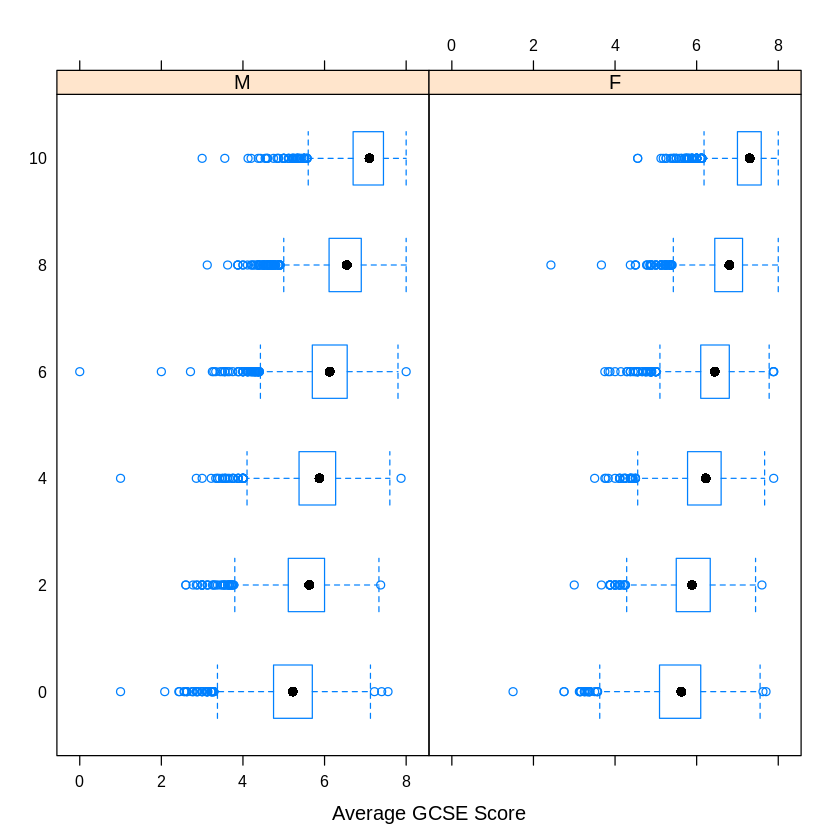

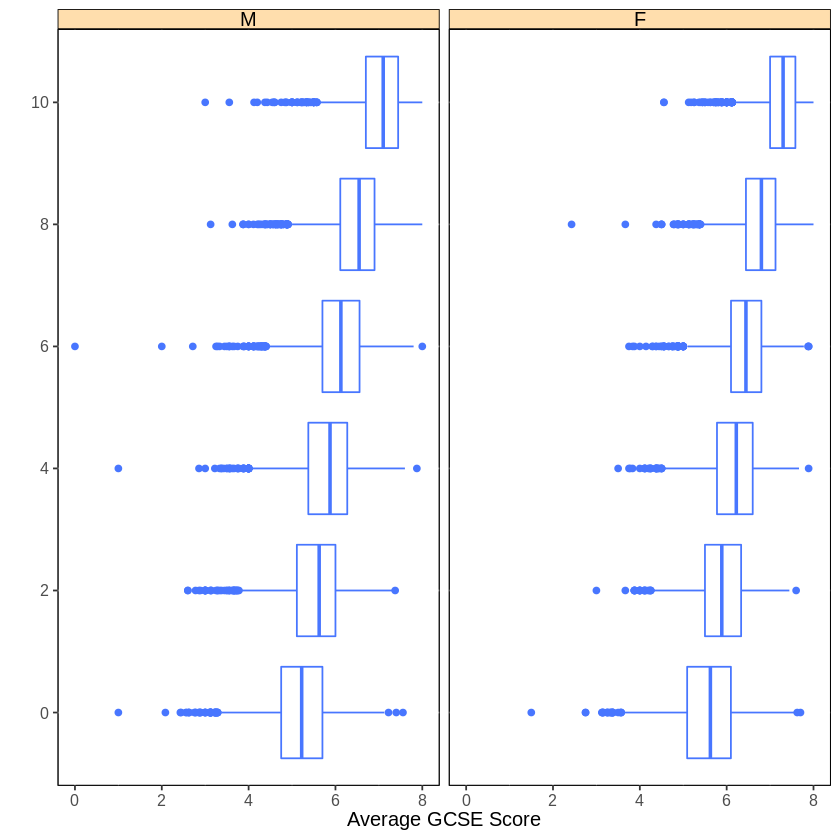

In [12]:
bwplot(factor(score) ~ gcsescore | gender, data = Chem97, 
       xlab = "Average GCSE Score")
ggplot(Chem97, aes(x = gcsescore, y = factor(score)))+
    geom_boxplot(fill = "white", color = "royalblue1") +
    facet_wrap(~gender) +
    labs(x = "Average GCSE Score", y = "")

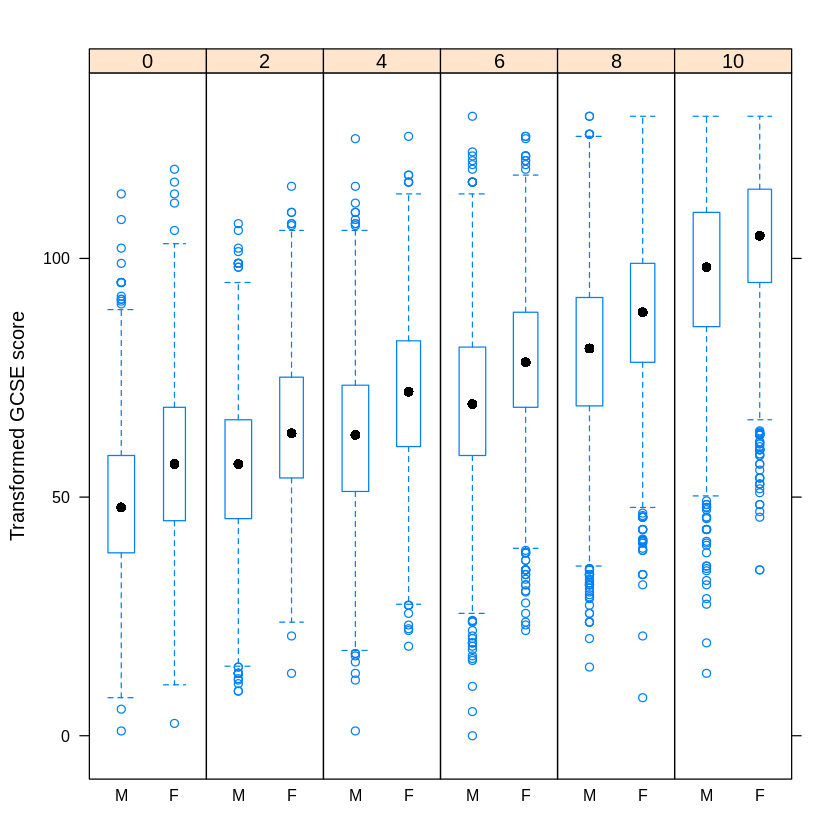

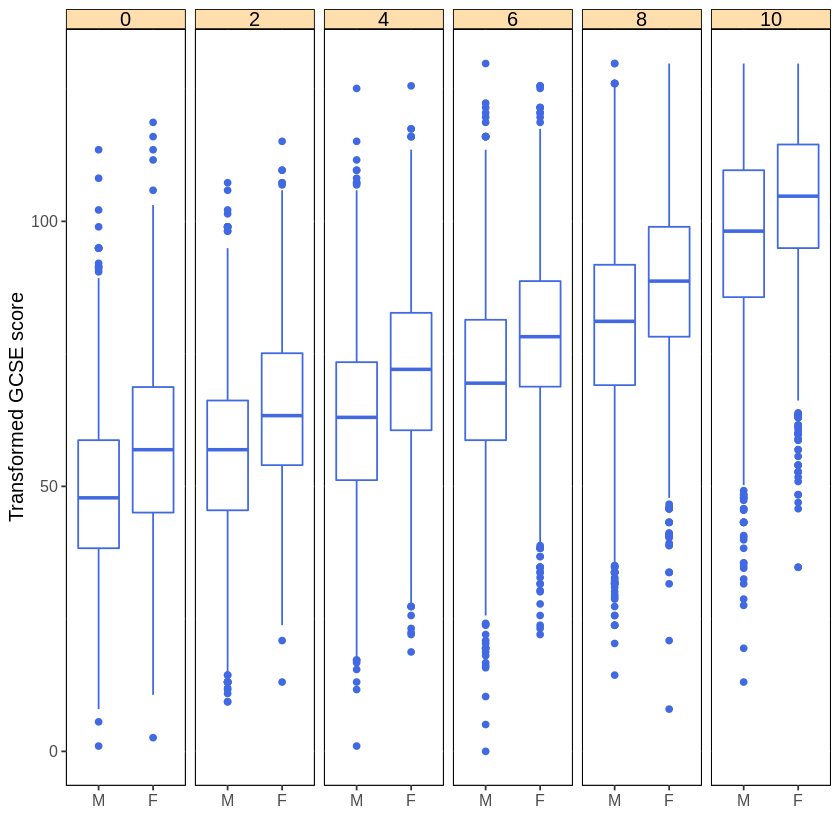

In [13]:
bwplot(gcsescore^2.34 ~ gender | factor(score), Chem97, 
       varwidth = TRUE, layout = c(6, 1),
       ylab = "Transformed GCSE score")
ggplot(Chem97, aes(y = gcsescore^2.34, x = factor(gender))) +
    geom_boxplot(fill = "white", color = "royalblue") +
    facet_wrap(~score, nrow = 1) +
    labs(x = "", y = "Transformed GCSE score")

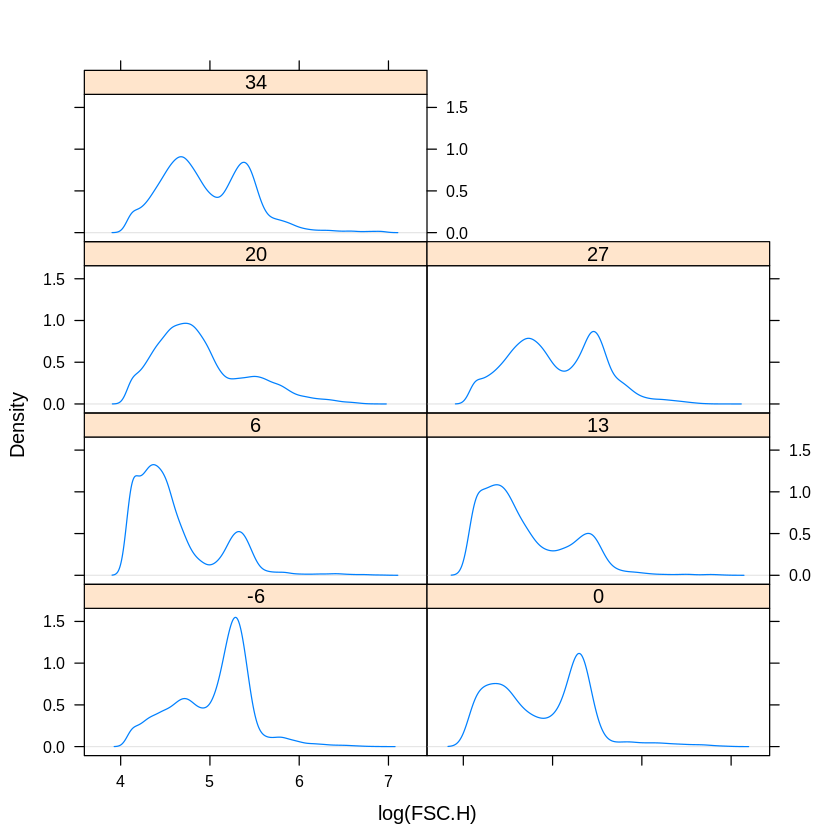

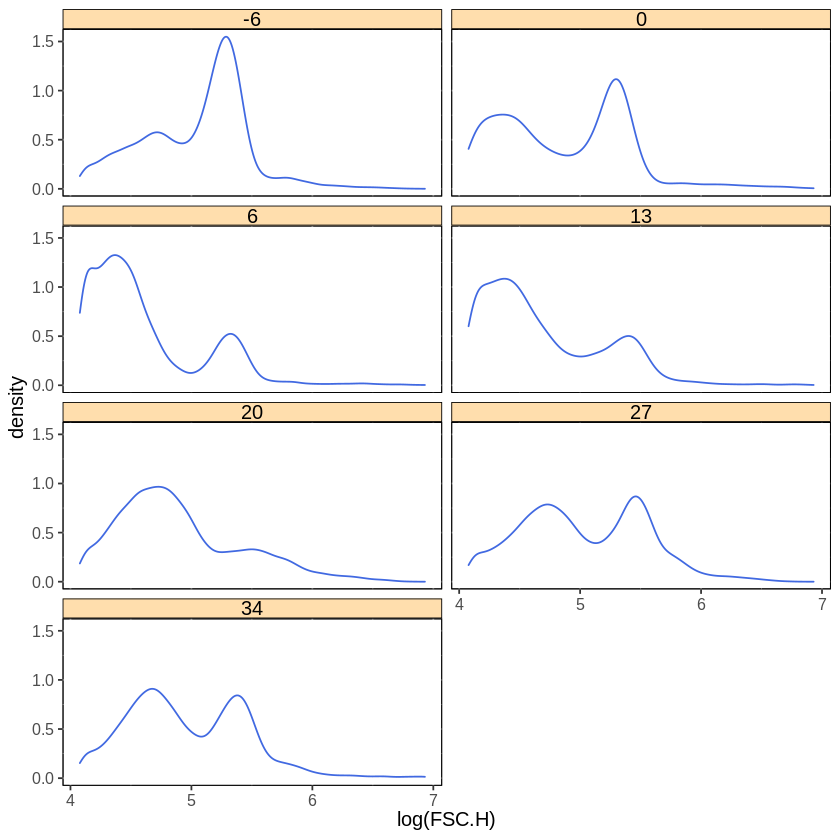

In [14]:
data(gvhd10)
densityplot(~log(FSC.H) | Days, data = gvhd10, 
            plot.points = FALSE, ref = TRUE, layout = c(2, 4))
ggplot(gvhd10, aes(x = log(FSC.H))) +
  geom_density(color = "royalblue") +
  facet_wrap(~Days, ncol=2)

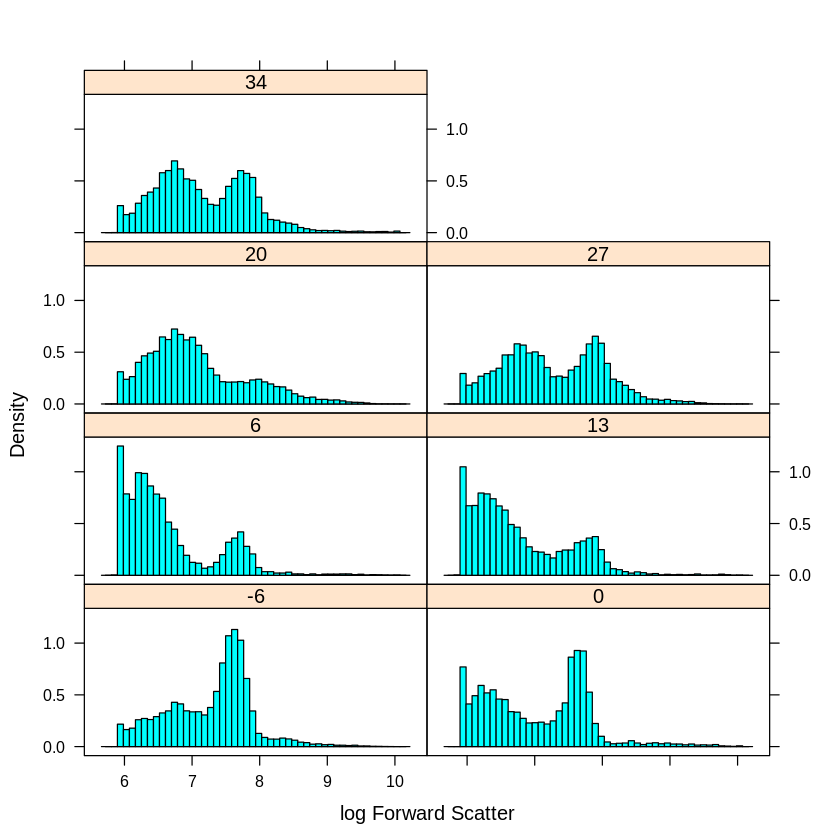

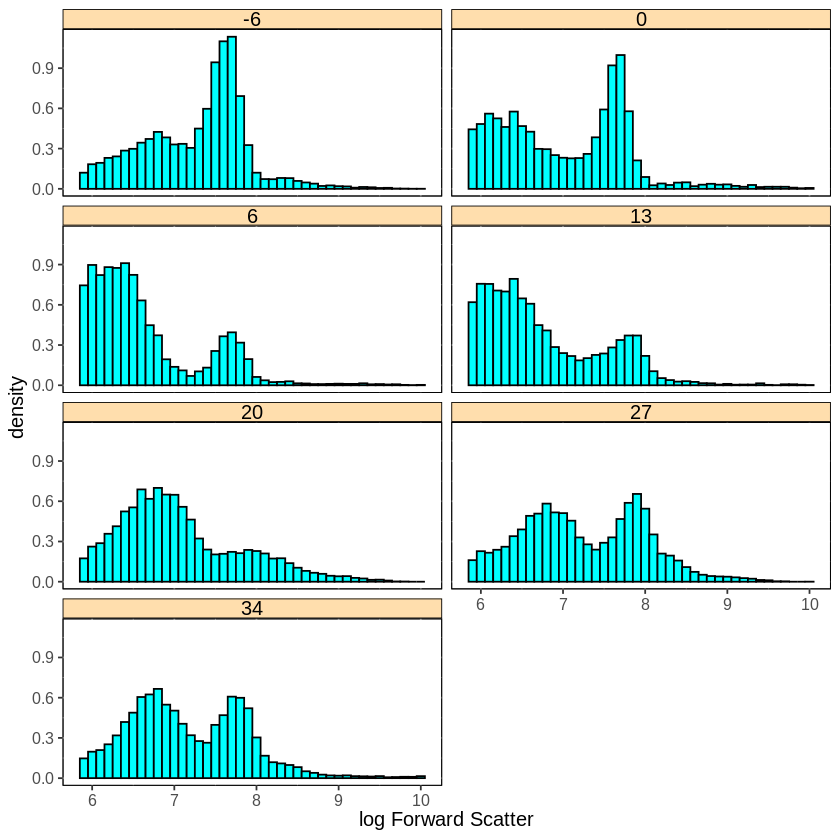

In [15]:
histogram(~log2(FSC.H) | Days, gvhd10, xlab = "log Forward Scatter",
          type = "density", nint = 50, layout = c(2, 4))
ggplot(gvhd10, aes(x = log2(FSC.H))) +
    geom_histogram(aes(y = ..density..), binwidth = 0.1, color = "black", fill = "cyan") +
    facet_wrap(~Days, ncol = 2) +
    labs(x = "log Forward Scatter")

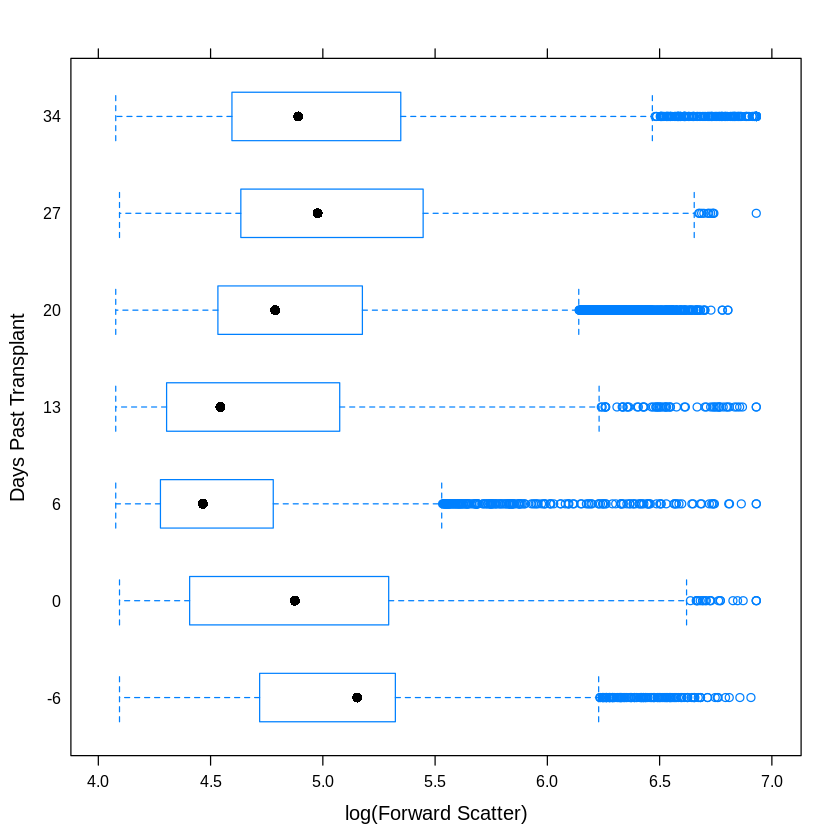

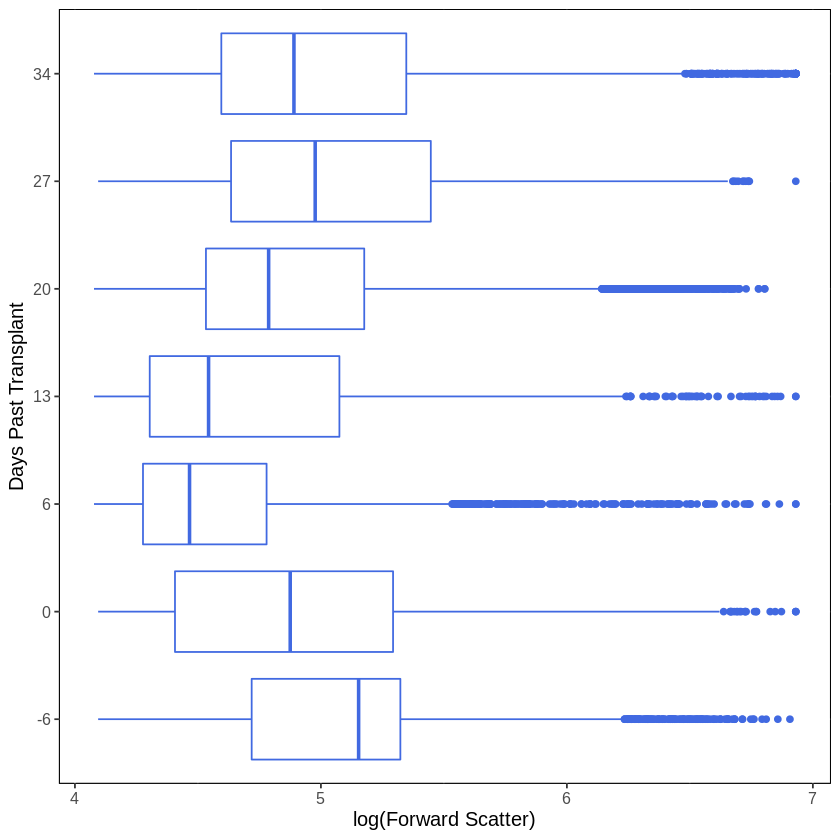

In [16]:
bwplot(Days ~ log(FSC.H), data = gvhd10, 
       xlab = "log(Forward Scatter)", ylab = "Days Past Transplant")
ggplot(gvhd10, aes(x = log(FSC.H), y = factor(Days))) +
  geom_boxplot(color = "royalblue") +
  labs(x = "log(Forward Scatter)", y = "Days Past Transplant")

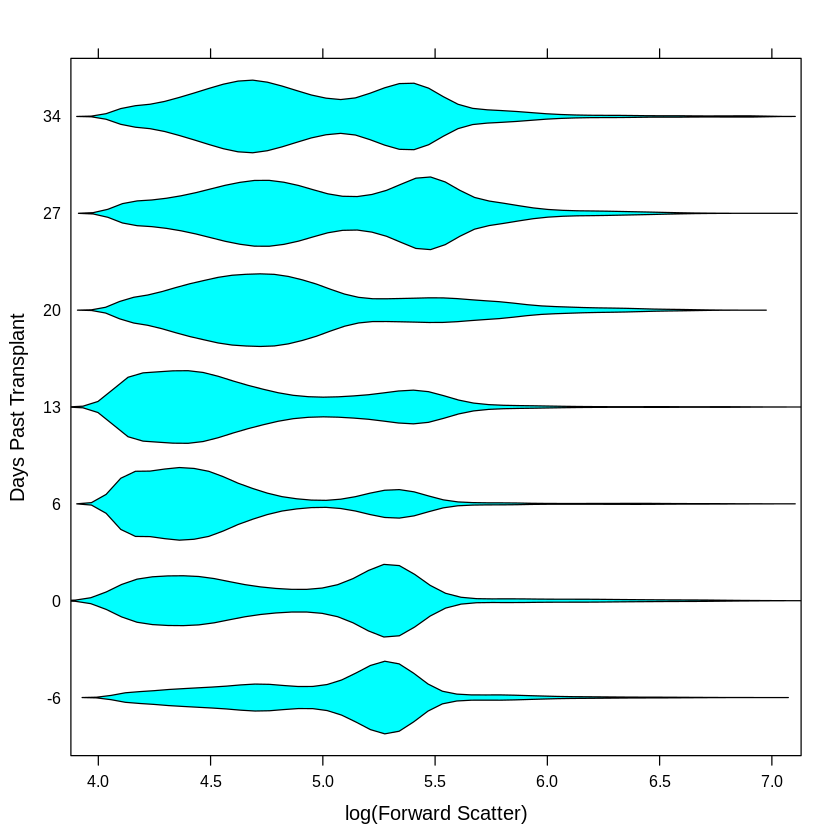

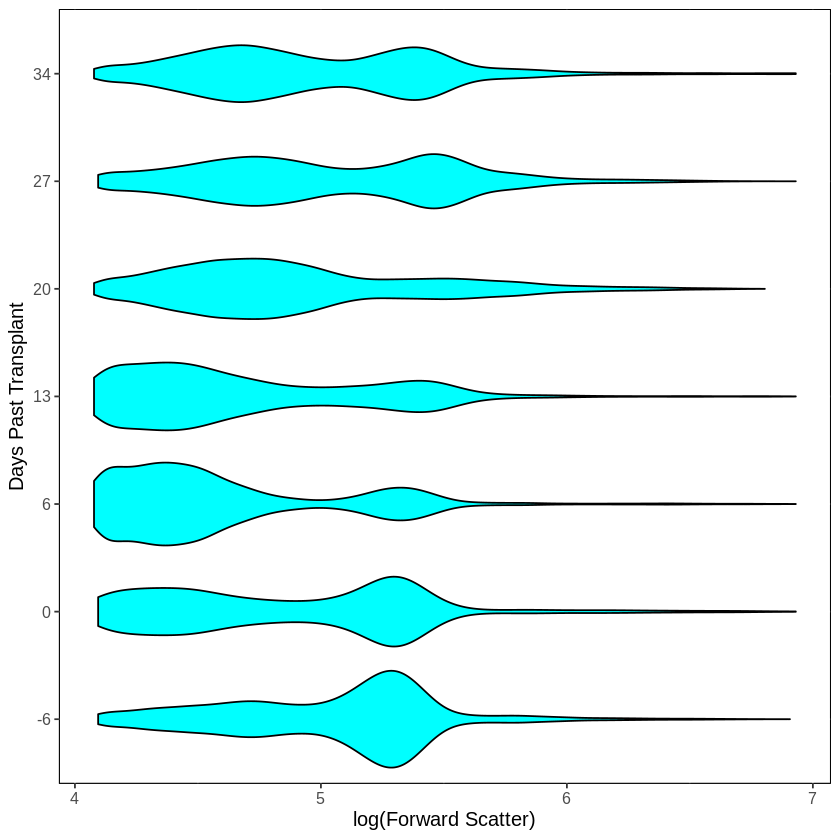

In [17]:
bwplot(Days ~ log(FSC.H), gvhd10, 
       panel = panel.violin, box.ratio = 3,
       xlab = "log(Forward Scatter)", 
       ylab = "Days Past Transplant")
ggplot(gvhd10, aes(x = log(FSC.H), y = factor(Days))) +
    geom_violin(color = "black", fill = "cyan") +
    labs(x = "log(Forward Scatter)", y = "Days Past Transplant")

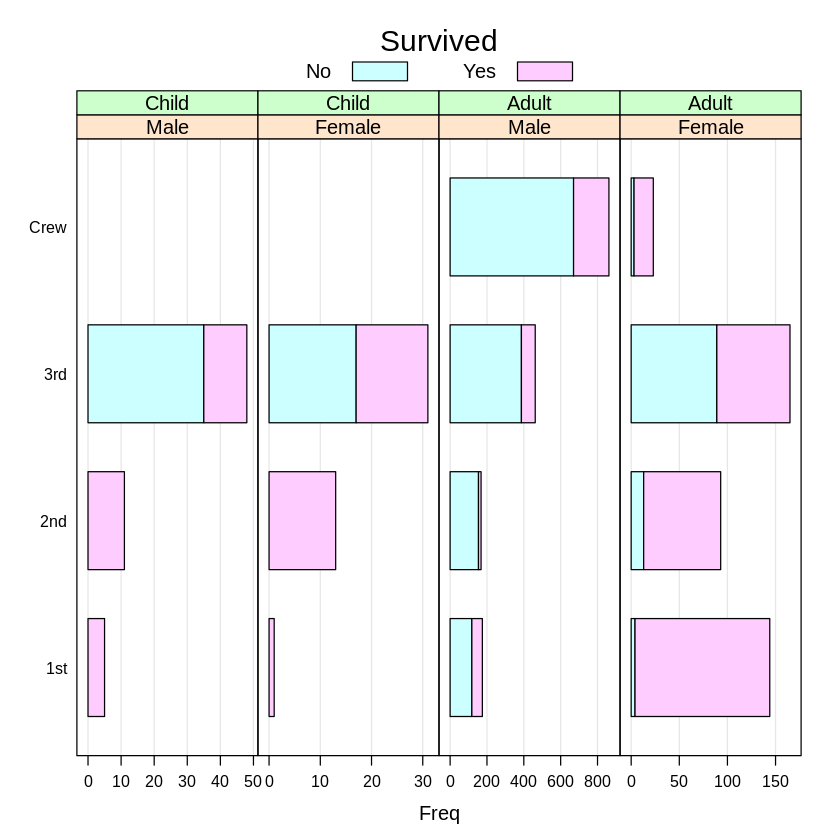

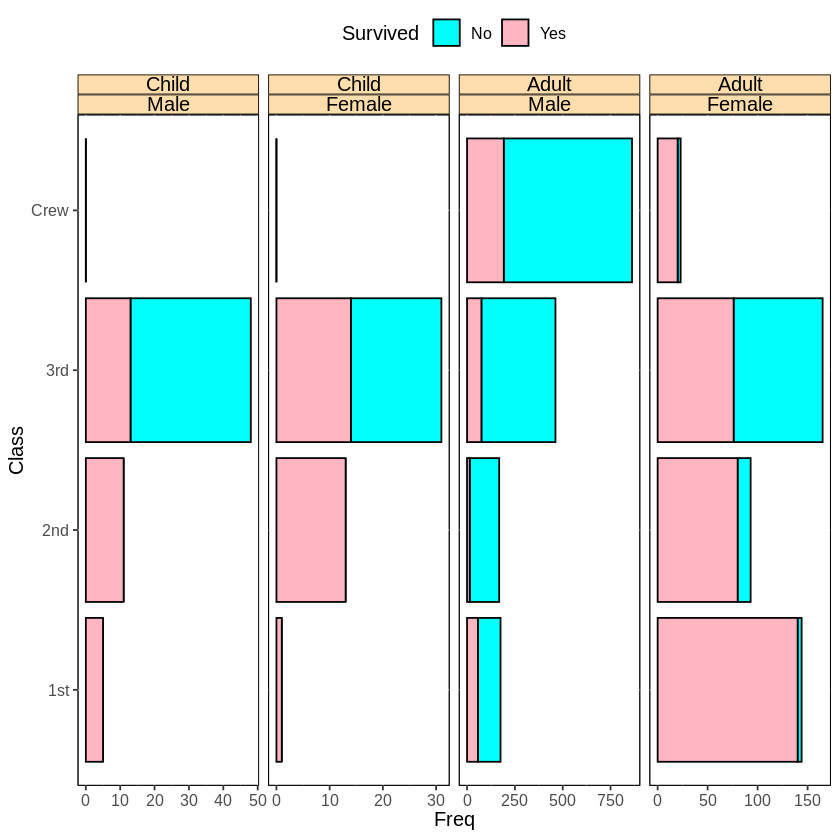

In [18]:
bc.titanic <- 
    barchart(Class ~ Freq | Sex + Age, as.data.frame(Titanic), 
             groups = Survived, stack = TRUE, layout = c(4, 1),
             auto.key = list(title = "Survived", columns = 2),
             scales = list(x = "free"))
update(bc.titanic, 
       panel = function(...) {
           panel.grid(h = 0, v = -1)
           panel.barchart(...)
       })
ggplot(as.data.frame(Titanic), aes(x = Freq, y = Class, fill = Survived)) + 
    geom_col(color = "black") +
    facet_grid(cols = vars(Age, Sex), scales = "free_x") +
    scale_fill_manual(values=c("cyan", "lightpink")) 

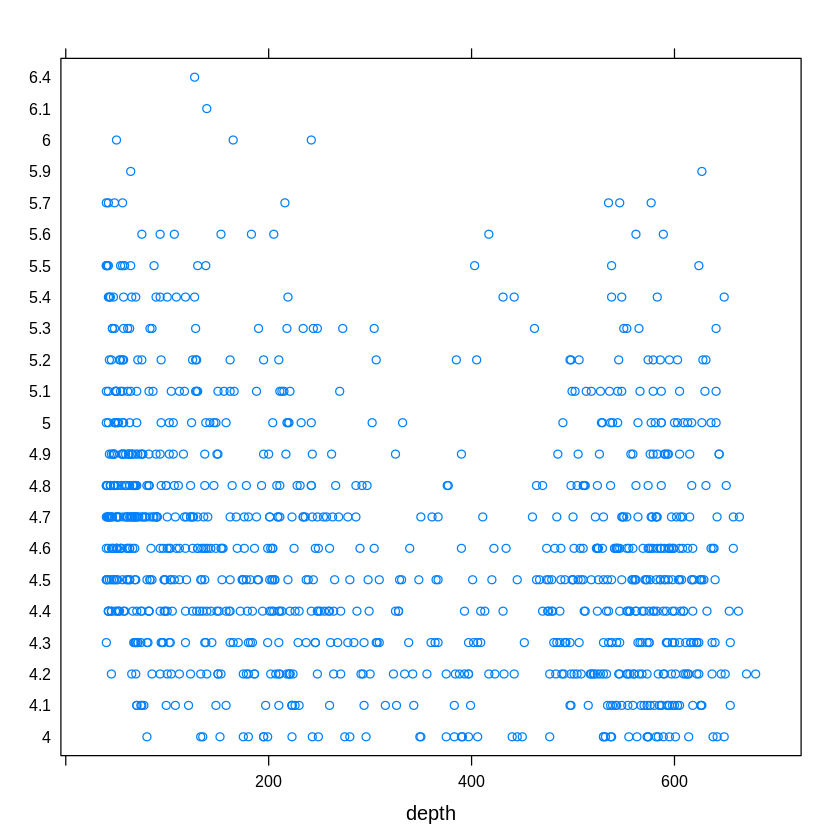

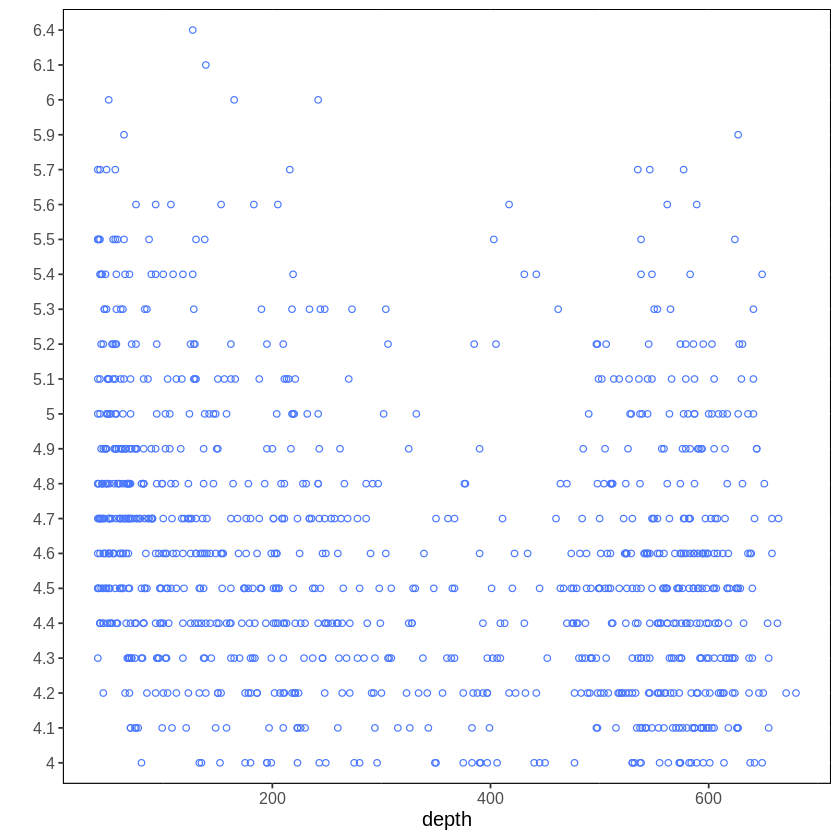

In [19]:
stripplot(factor(mag) ~ depth, quakes)
ggplot(quakes, aes(x=depth, y=factor(mag))) + 
    geom_point(color = "royalblue1", shape = 1) +
    labs(y = "")

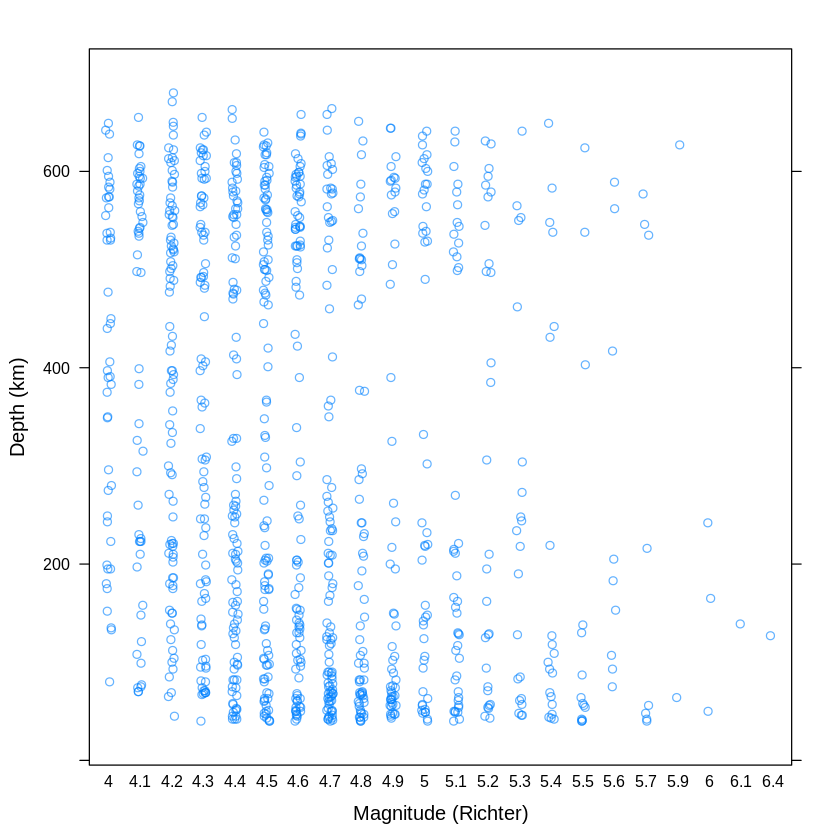

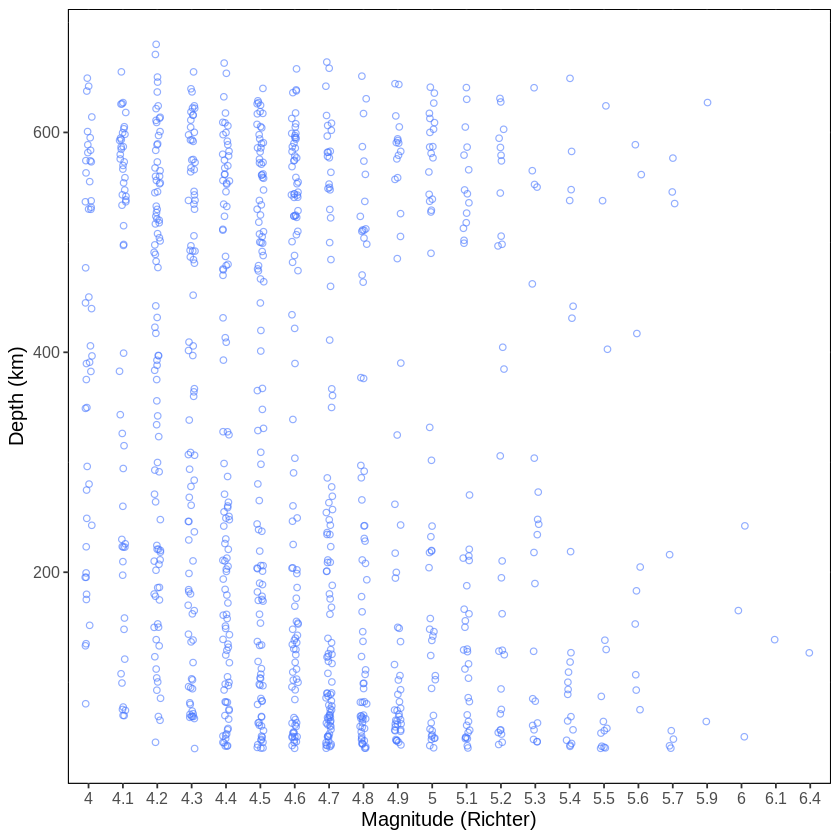

In [20]:
stripplot(depth ~ factor(mag), quakes, 
          jitter.data = TRUE, alpha = 0.6,
          xlab = "Magnitude (Richter)", ylab = "Depth (km)")
ggplot(quakes, aes(x = factor(mag), y = depth)) +
    geom_jitter(color = "royalblue1", shape = 1, alpha = 0.6, width = 0.1) +
    labs(x = "Magnitude (Richter)", y = "Depth (km)")

# xyplot.r

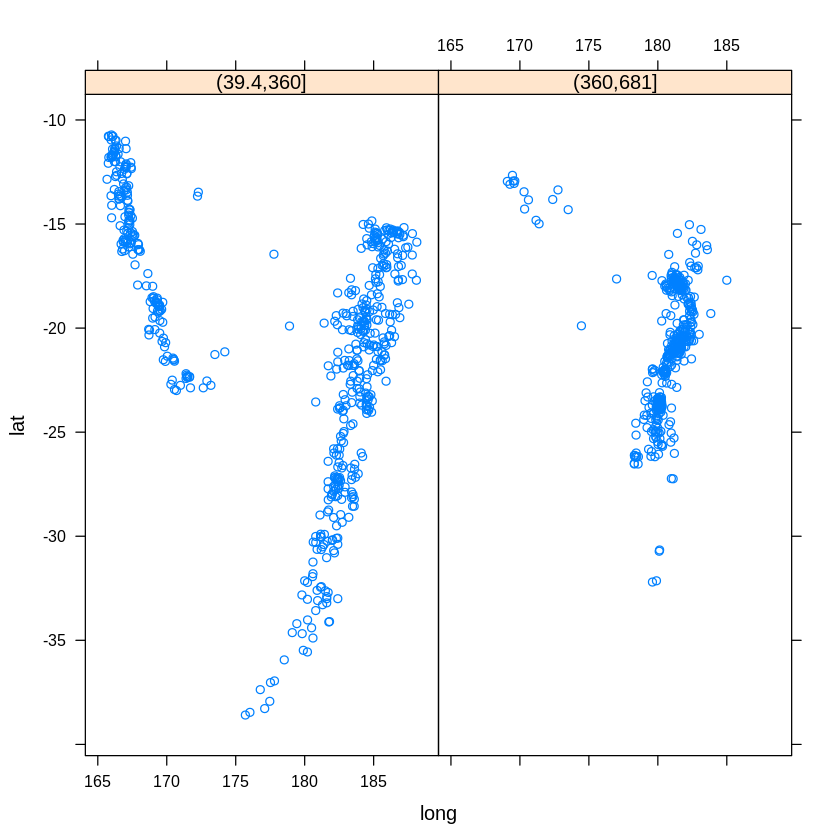

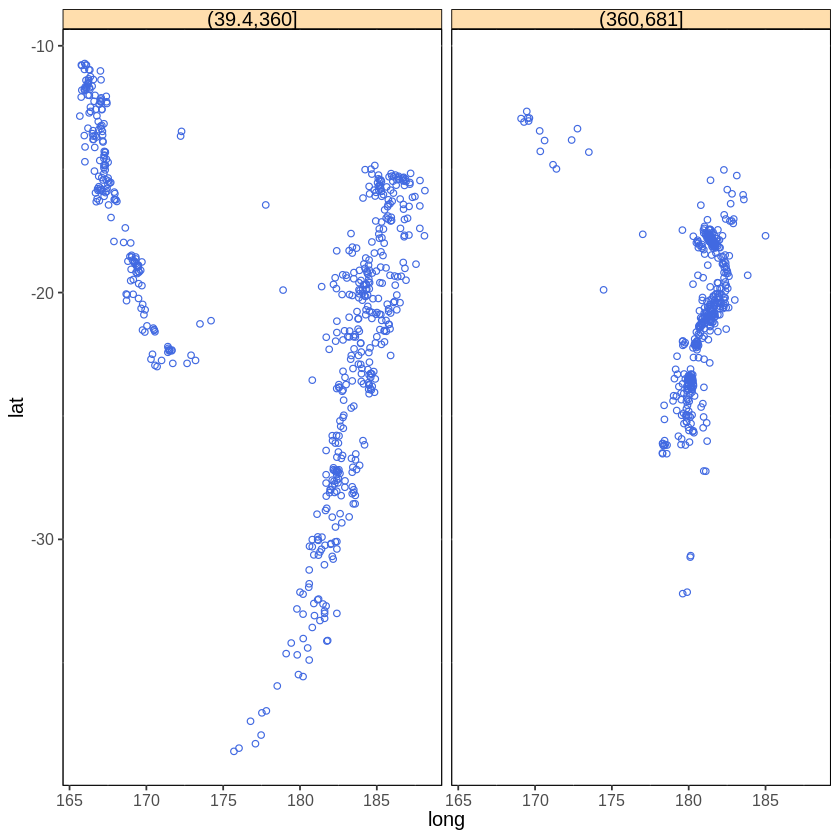

In [21]:
xyplot(lat ~ long | cut(depth, 2), data = quakes)
ggplot(quakes, aes(x = long, y = lat)) +
    facet_wrap(~cut(depth, 2)) +
    geom_point(color = "royalblue", shape = 1)

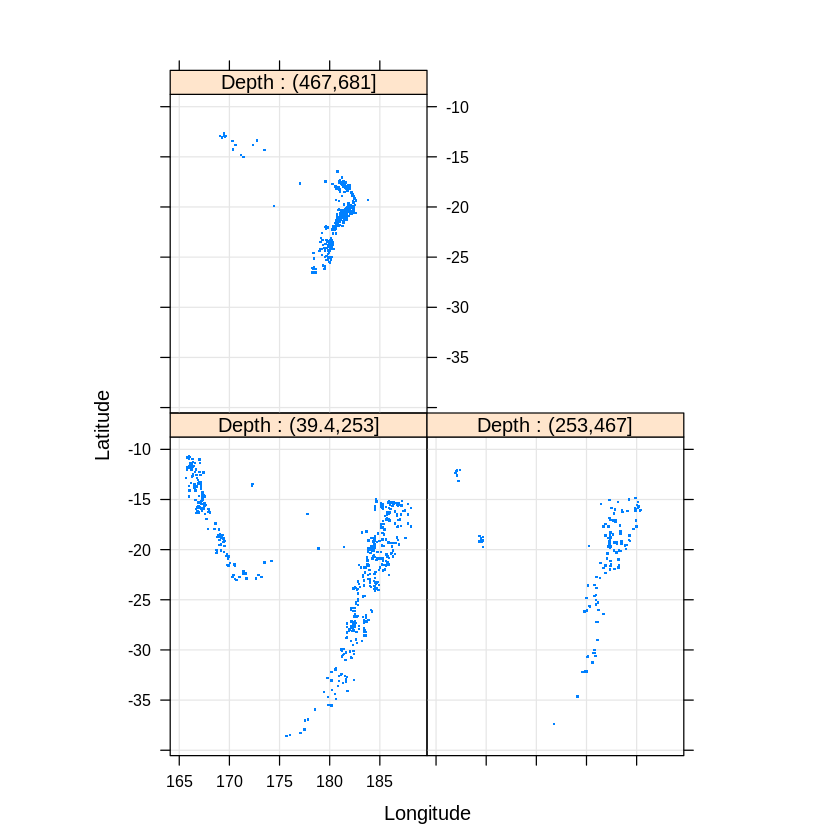

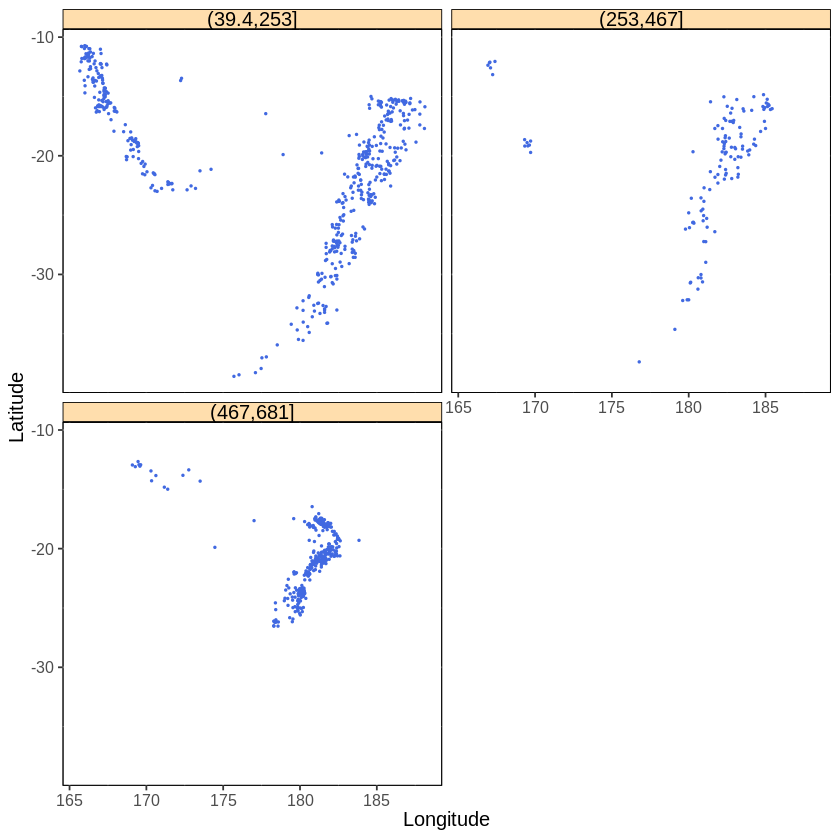

In [22]:
xyplot(lat ~ long | cut(depth, 3), data = quakes, 
       aspect = "iso", pch = ".", cex = 2, type = c("p", "g"),
       xlab = "Longitude", ylab = "Latitude", 
       strip = strip.custom(strip.names = TRUE, var.name = "Depth"))
ggplot(quakes, aes(x = long, y = lat)) +
    facet_wrap(~cut(depth, 3), ncol = 2) +
    geom_point(color = "royalblue", size = 0.3) +
    labs(x = "Longitude", y = "Latitude")

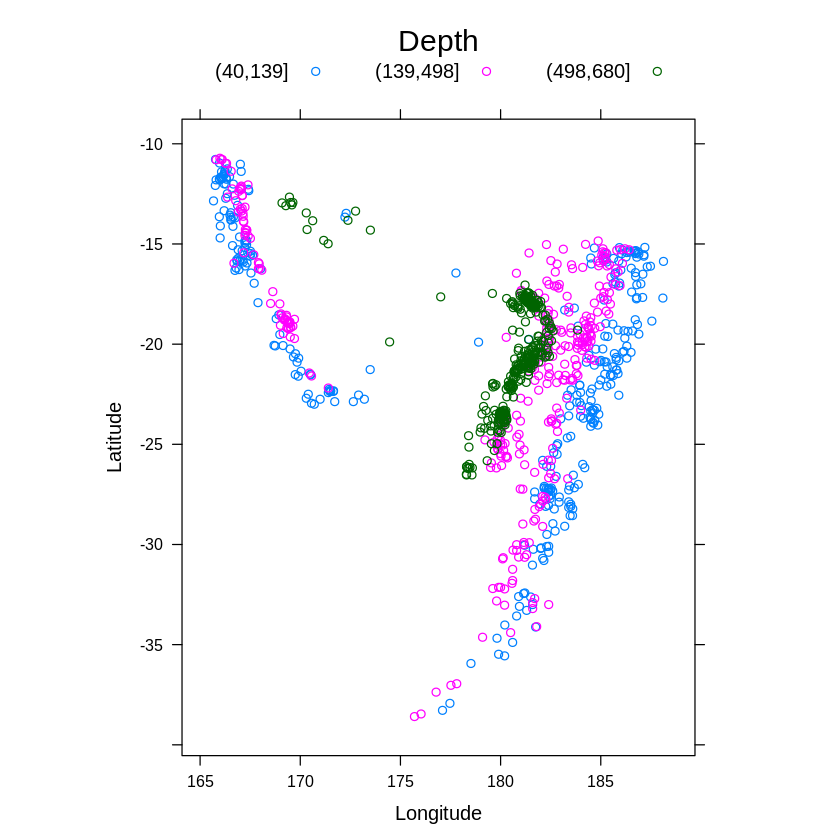

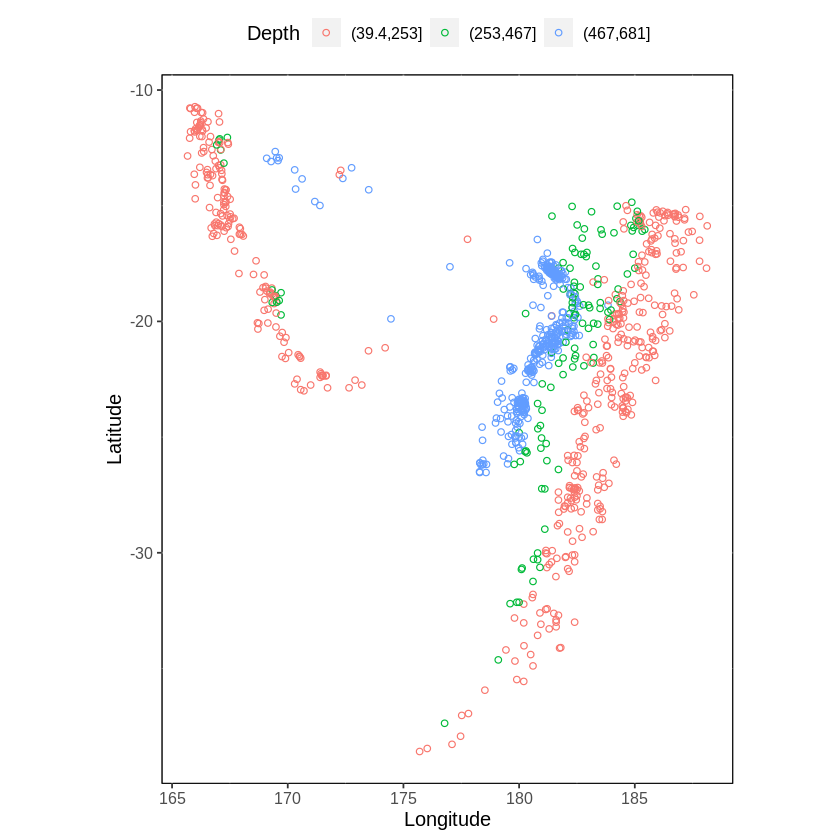

In [23]:
xyplot(lat ~ long, data = quakes, aspect = "iso",
       groups = cut(depth, breaks = quantile(depth, ppoints(4, 1))), 
       auto.key = list(columns = 3, title = "Depth"), 
       xlab = "Longitude", ylab = "Latitude")
ggplot(quakes, aes(x = long, y = lat)) +
    geom_point(aes(color = cut(depth, 3)), shape = 1) +
    coord_fixed() +
    theme(legend.position = "top") +
    labs(x = "Longitude", y = "Latitude", color = "Depth")

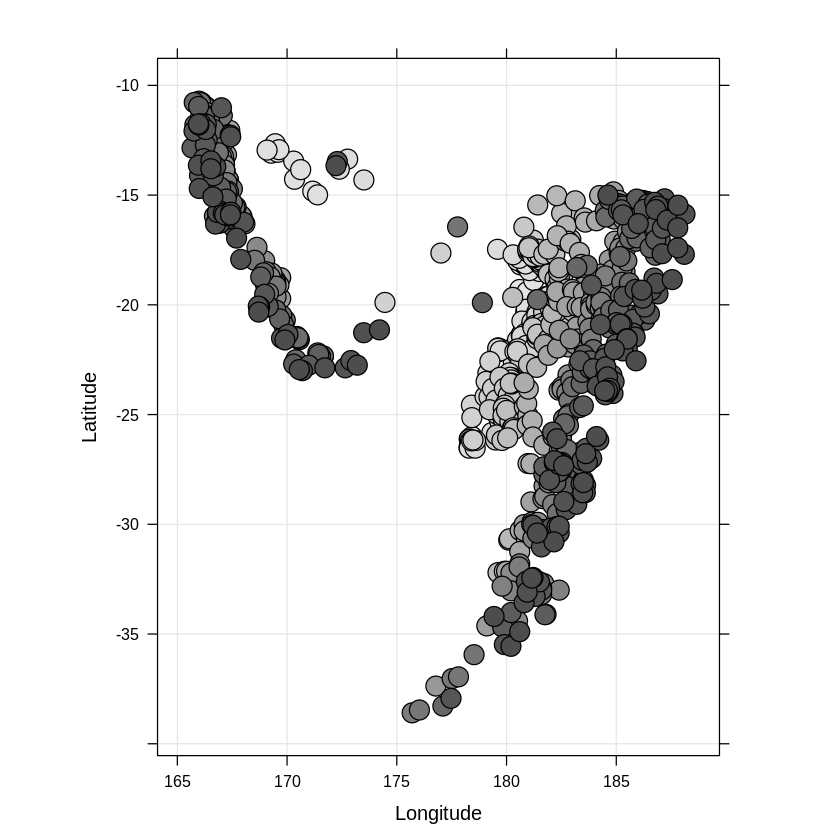

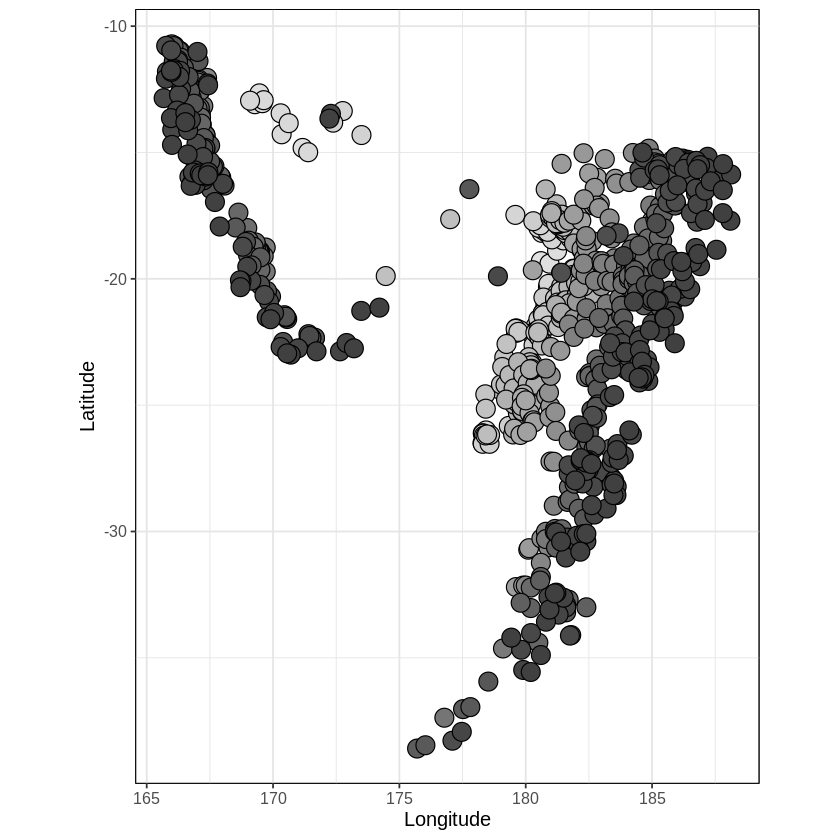

In [24]:
depth.col <- gray.colors(100)[cut(quakes$depth, 100, label = FALSE)]
depth.ord <- rev(order(quakes$depth))

xyplot(lat ~ long, data = quakes[depth.ord, ], 
       aspect = "iso", type = c("p", "g"), col = "black",
       pch = 21, fill = depth.col[depth.ord], cex = 2,
       xlab = "Longitude", ylab = "Latitude")
ggplot(quakes[depth.ord,], aes(x=long, y=lat)) + 
    geom_point(aes(fill = depth), size = 5, shape = 21) +
    scale_fill_gradient(low="grey25", high="grey90") +
    theme(legend.position = "none", panel.grid = element_line(colour = "grey90")) +
    labs(x = "Longitude", y = "Latitude") +
    coord_fixed()